In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df = pd.read_csv('Heartrate.csv')

df

,Id,Date,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Calories
0,4558609924,04-12-2016,5135,3.39,318,76.639377,1909
1,4558609924,14-04-2016,6799,4.49,279,81.556556,1922
2,4558609924,20-04-2016,4803,3.17,222,76.923272,1788
3,4558609924,24-04-2016,8563,5.66,395,83.969233,2173
4,4558609924,05-01-2016,3428,2.27,190,70.841904,1692
...,...,...,...,...,...,...,...
327,6962181067,05-06-2016,5908,3.91,299,72.334367,1850
328,6962181067,27-04-2016,10320,6.82,324,72.996975,2034
329,6962181067,17-04-2016,10145,6.71,313,76.664489,2027
330,6962181067,05-04-2016,10147,6.71,335,79.474591,2086


In [2]:
from datetime import datetime

# Convert 'date' column to datetime format with specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract day of the week and month name into new columns
df['Day'] = df['Date'].dt.strftime('%A') # Full name of the day (e.g., Monday)
df['Month'] = df['Date'].dt.strftime('%B') # Full name of the month (e.g., January)

print(df)

             Id       Date  TotalSteps  TotalDistance  TotalActiveMinutes  \
0    4558609924 2016-12-04        5135           3.39                 318   
1    4558609924 2016-04-14        6799           4.49                 279   
2    4558609924 2016-04-20        4803           3.17                 222   
3    4558609924 2016-04-24        8563           5.66                 395   
4    4558609924 2016-01-05        3428           2.27                 190   
..          ...        ...         ...            ...                 ...   
327  6962181067 2016-06-05        5908           3.91                 299   
328  6962181067 2016-04-27       10320           6.82                 324   
329  6962181067 2016-04-17       10145           6.71                 313   
330  6962181067 2016-04-05       10147           6.71                 335   
331  6962181067 2016-04-16       13217           8.74                 333   

     Heart_rate  Calories        Day     Month  
0     76.639377      1909 

In [3]:
#dropping unwanted columns
columns_to_drop = ['Id','Date']
df= df.drop(columns_to_drop,axis = 1)

In [4]:
df

,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Calories,Day,Month
0,5135,3.39,318,76.639377,1909,Sunday,December
1,6799,4.49,279,81.556556,1922,Thursday,April
2,4803,3.17,222,76.923272,1788,Wednesday,April
3,8563,5.66,395,83.969233,2173,Sunday,April
4,3428,2.27,190,70.841904,1692,Tuesday,January
...,...,...,...,...,...,...,...
327,5908,3.91,299,72.334367,1850,Sunday,June
328,10320,6.82,324,72.996975,2034,Wednesday,April
329,10145,6.71,313,76.664489,2027,Sunday,April
330,10147,6.71,335,79.474591,2086,Tuesday,April


C:\Users\aadin\AppData\Local\Temp\ipykernel_20148\2199168180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr()


<Axes: >

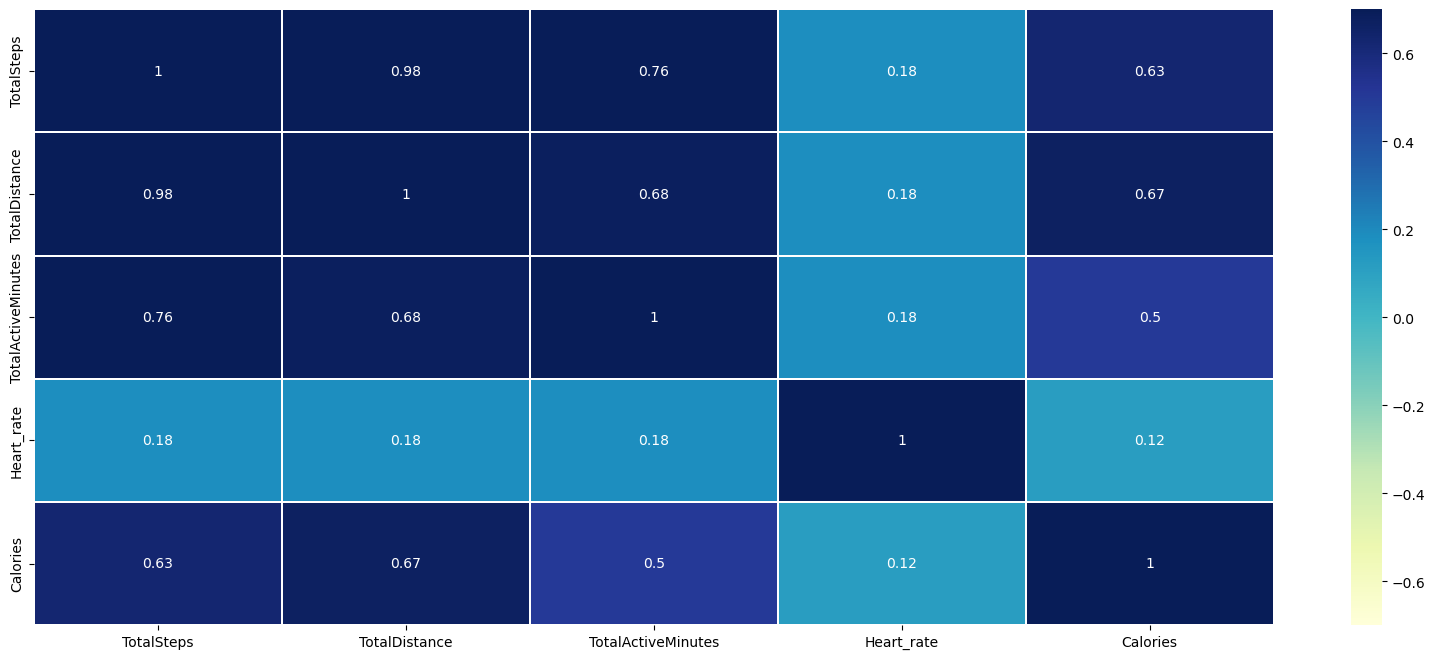

In [5]:
corrmatrix = df.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix,vmin = -0.7,vmax= 0.7, annot = True,linewidths=0.2,cmap='YlGnBu')

In [6]:
df.isnull().sum()

TotalSteps            0
TotalDistance         0
TotalActiveMinutes    0
Heart_rate            0
Calories              0
Day                   0
Month                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for 'day' column
day_encoder = LabelEncoder()
df['Day_encoded'] = day_encoder.fit_transform(df['Day'])

# Initialize LabelEncoder for 'month' column
month_encoder = LabelEncoder()
df['Month_encoded'] = month_encoder.fit_transform(df['Month'])

df


,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Calories,Day,Month,Day_encoded,Month_encoded
0,5135,3.39,318,76.639377,1909,Sunday,December,3,2
1,6799,4.49,279,81.556556,1922,Thursday,April,4,0
2,4803,3.17,222,76.923272,1788,Wednesday,April,6,0
3,8563,5.66,395,83.969233,2173,Sunday,April,3,0
4,3428,2.27,190,70.841904,1692,Tuesday,January,5,4
...,...,...,...,...,...,...,...,...,...
327,5908,3.91,299,72.334367,1850,Sunday,June,3,6
328,10320,6.82,324,72.996975,2034,Wednesday,April,6,0
329,10145,6.71,313,76.664489,2027,Sunday,April,3,0
330,10147,6.71,335,79.474591,2086,Tuesday,April,5,0


In [8]:
#dropping unwanted columns
columns_to_drop = ['Day','Month']
df= df.drop(columns_to_drop,axis = 1)
df

,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Calories,Day_encoded,Month_encoded
0,5135,3.39,318,76.639377,1909,3,2
1,6799,4.49,279,81.556556,1922,4,0
2,4803,3.17,222,76.923272,1788,6,0
3,8563,5.66,395,83.969233,2173,3,0
4,3428,2.27,190,70.841904,1692,5,4
...,...,...,...,...,...,...,...
327,5908,3.91,299,72.334367,1850,3,6
328,10320,6.82,324,72.996975,2034,6,0
329,10145,6.71,313,76.664489,2027,3,0
330,10147,6.71,335,79.474591,2086,5,0


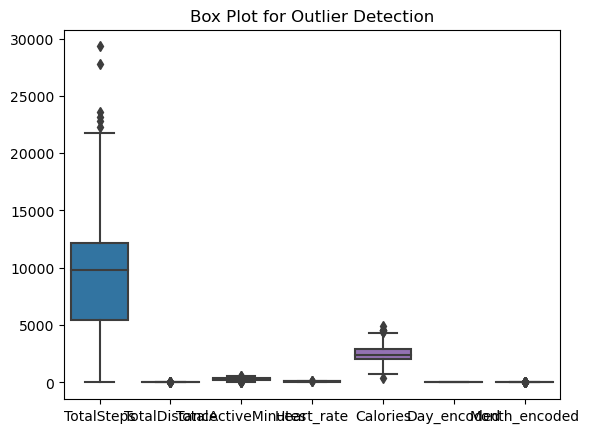

In [9]:
sns.boxplot(df)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [10]:
# treating the outlier

q1 = df['TotalSteps'].quantile (0.25)
q3 = df['TotalSteps'].quantile (0.75)

iqr = q3-q1
iqr

6699.75

In [11]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print(upper_limit)
print(lower_limit)

22199.625
-4599.375


In [12]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [13]:
#applying the imputer function

df['TotalSteps']= df['TotalSteps'].apply(limit_imputer)

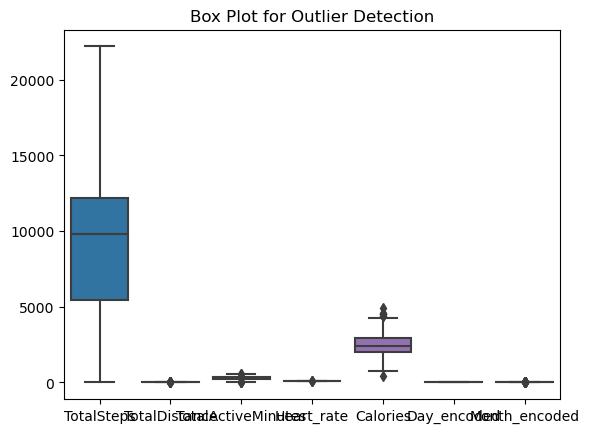

In [14]:
sns.boxplot(df)
plt.title('Box Plot for Outlier Detection')
plt.show()

<Axes: xlabel='TotalActiveMinutes'>

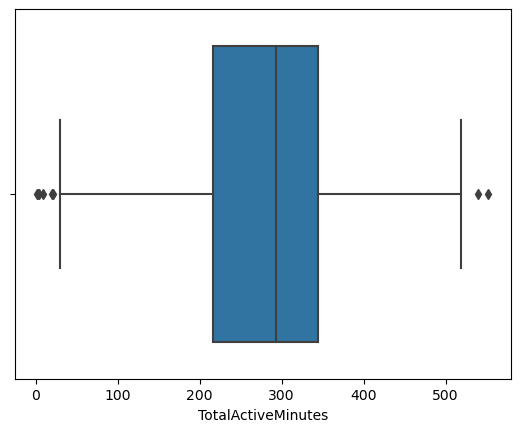

In [15]:
sns.boxplot(x = df ['TotalActiveMinutes'])

In [16]:
q1 = df['TotalActiveMinutes'].quantile (0.25)
q3 = df['TotalActiveMinutes'].quantile (0.75)

iqr = q3-q1
iqr

127.5

In [17]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print(upper_limit)
print(lower_limit)

535.5
25.5


In [18]:
df['TotalActiveMinutes']= df['TotalActiveMinutes'].apply(limit_imputer)

<Axes: xlabel='TotalDistance'>

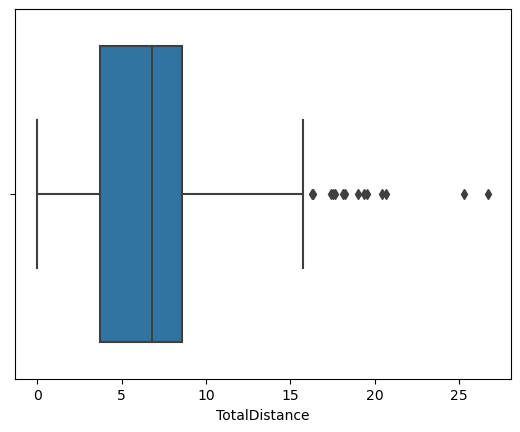

In [19]:
sns.boxplot(x = df ['TotalDistance'])

In [20]:
q1 = df['TotalDistance'].quantile (0.25)
q3 = df['TotalDistance'].quantile (0.75)

iqr = q3-q1
iqr

4.8199998735

In [21]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print(upper_limit)
print(lower_limit)

15.787499696
-3.492499798


In [22]:
df['TotalDistance']= df['TotalDistance'].apply(limit_imputer)

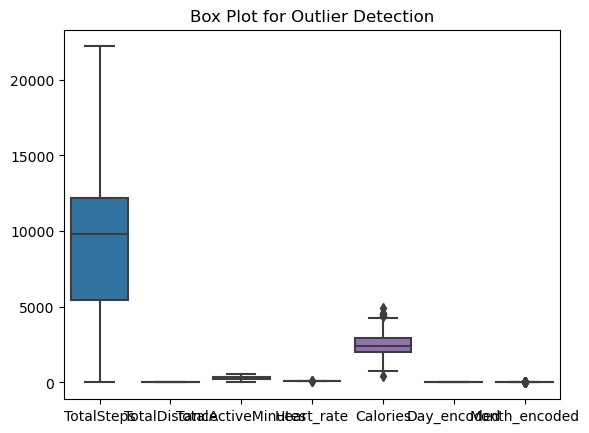

In [23]:
sns.boxplot(df)
plt.title('Box Plot for Outlier Detection')
plt.show()

<Axes: xlabel='Heart_rate'>

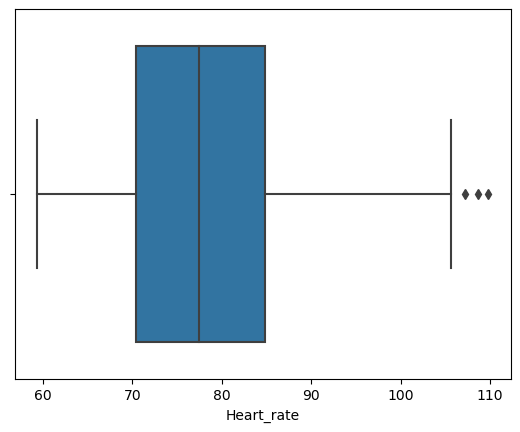

In [24]:
sns.boxplot(x = df ['Heart_rate'])

In [25]:
q1 = df['Heart_rate'].quantile (0.25)
q3 = df['Heart_rate'].quantile (0.75)

iqr = q3-q1
iqr

14.418096347499997

In [26]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print(upper_limit)
print(lower_limit)

106.49754879374998
48.825163403750004


In [27]:
df['Heart_rate']= df['Heart_rate'].apply(limit_imputer)

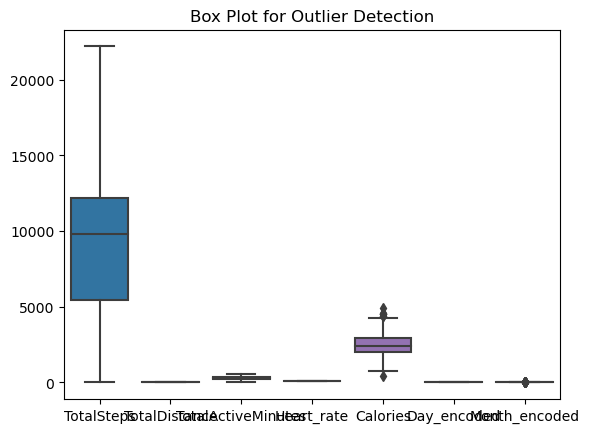

In [28]:
sns.boxplot(df)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [29]:
x_df = df.drop('Calories', axis = 1)
y_df = df['Calories']

In [30]:
x_df

,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Day_encoded,Month_encoded
0,5135.0,3.39,318.0,76.639377,3,2
1,6799.0,4.49,279.0,81.556556,4,0
2,4803.0,3.17,222.0,76.923272,6,0
3,8563.0,5.66,395.0,83.969233,3,0
4,3428.0,2.27,190.0,70.841904,5,4
...,...,...,...,...,...,...
327,5908.0,3.91,299.0,72.334367,3,6
328,10320.0,6.82,324.0,72.996975,6,0
329,10145.0,6.71,313.0,76.664489,3,0
330,10147.0,6.71,335.0,79.474591,5,0


In [31]:
y_df

0      1909
1      1922
2      1788
3      2173
4      1692
       ... 
327    1850
328    2034
329    2027
330    2086
331    2173
Name: Calories, Length: 332, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df,test_size=0.05,random_state=46)

### The model gave more accurate values without scaling the data

In [34]:
x_train.shape

(315, 6)

In [35]:
y_train.shape

(315,)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
#making predictions
y_pred = linear_regressor.predict(x_test)

In [39]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Mean Squared Error: 156931.0185165997
Coefficients: [-2.38907462e-01  4.16650204e+02  1.34457408e+00  1.33757953e+00
  8.27050712e+00 -2.17629277e+00]
Intercept: 1500.5262978733433


In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7374500950013464


# Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

# Creating and training the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(x_train, y_train)

# Making predictions
y_pred_ridge = ridge_regressor.predict(x_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Coefficients (Ridge):", ridge_regressor.coef_)
print("Intercept (Ridge):", ridge_regressor.intercept_)

Mean Squared Error (Ridge): 157108.13055890717
Coefficients (Ridge): [-2.35870156e-01  4.12704518e+02  1.33658882e+00  1.31708286e+00
  8.27557565e+00 -2.19791719e+00]
Intercept (Ridge): 1502.2653985999398


In [42]:
r2r = r2_score(y_test, y_pred_ridge)
print("R² Score:", r2r)

R² Score: 0.7371537816891568


In [43]:
from sklearn.linear_model import Lasso

# Creating and training the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(x_train, y_train)

# Making predictions
y_pred_lasso = lasso_regressor.predict(x_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
print("Coefficients (Lasso):", lasso_regressor.coef_)
print("Intercept (Lasso):", lasso_regressor.intercept_)

Mean Squared Error (Lasso): 156950.13309206814
Coefficients (Lasso): [-2.38674588e-01  4.16349218e+02  1.34393988e+00  1.33492352e+00
  8.24594109e+00 -2.16876323e+00]
Intercept (Lasso): 1500.7952615759868


In [44]:
r2l = r2_score(y_test, y_pred_lasso)
print("R² Score:", r2l)

R² Score: 0.737418115791495


# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generating polynomial features
poly_features = PolynomialFeatures(degree=2)

# Creating and training the Polynomial Regression model
poly_regressor = make_pipeline(poly_features, Ridge(alpha=0.1))
poly_regressor.fit(x_train, y_train)

# Making predictions
y_pred_poly = poly_regressor.predict(x_test)

# Evaluating the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial):", mse_poly)

Mean Squared Error (Polynomial): 136753.549250163


C:\Users\aadin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.02468e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [46]:
r2p = r2_score(y_test, y_pred_poly)
print("R² Score:", r2p)

R² Score: 0.7712075553752867


# Comparing Models

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R²']:.4f}")

Linear Regression: MSE = 156931.0185, R² = 0.7375
Polynomial Regression (degree=2): MSE = 142012.3130, R² = 0.7624
Ridge Regression: MSE = 156948.5005, R² = 0.7374
Lasso Regression: MSE = 156950.1331, R² = 0.7374
Support Vector Regression: MSE = 618954.7826, R² = -0.0355
Decision Tree: MSE = 573853.9412, R² = 0.0399
Random Forest: MSE = 158639.5666, R² = 0.7346
Gradient Boosting: MSE = 161693.6204, R² = 0.7295


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 3. Set up the pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', Ridge())  # You can use LinearRegression() instead of Ridge() if you don't want regularization
])

# 4. Define the parameter grid
param_grid = {
    'poly_features__degree': [2, 3, 4, 5],
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]  # Only applicable if you use Ridge
}

# 5. Use GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# 6. Evaluate the results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Predictions and evaluation on the test set
y_pred = grid_search.best_estimator_.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set Mean Squared Error: ", mse)
print("Test set R² Score: ", r2)

Best parameters found:  {'poly_features__degree': 2, 'regressor__alpha': 0.01}
Best cross-validation score (negative MSE):  -255281.02378660423
Test set Mean Squared Error:  132422.39618753982
Test set R² Score:  0.7784536934292882


In [96]:
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test set Mean Squared Error: ", mse)
r2 = r2_score(y_test, y_pred)
print("Test set R² Score: ", r2)

Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score (negative MSE):  -251560.63387022176
Test set Mean Squared Error:  159174.73010491833
Test set R² Score:  0.7336963038775405


Text(0.5, 1.0, 'Random Forest Regressor')

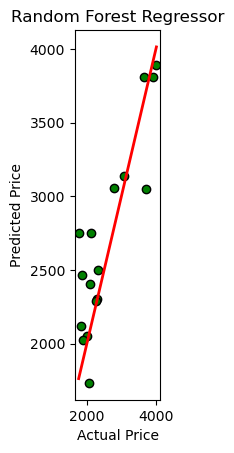

In [97]:
# Random Forest
plt.subplot(1, 5, 2)
plt.scatter(y_test, y_pred, color='green', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor')

In [98]:
X_split = np.array([[5135, 3.39, 318, 76.639377,3,2]])

# Make predictions for the input values
calories_predictions = best_rf.predict(X_split)

# Print the predictions
print("Predicted Calories:", calories_predictions)

Predicted Calories: [2003.53779143]


C:\Users\aadin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
# Example input values (replace with your own input values)
X_split = np.array([[5135, 3.39, 318, 76.639377,3,2]]) 
# Make predictions for the input values
calories_predictions = poly_regressor.predict(X_split)

# Print the predictions
print("Predicted Calories:", calories_predictions)

Predicted Calories: [2238.17055703]


C:\Users\aadin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
